# **Advanced Fraud Detection with Anomaly Detection**

The primary objective of this project is to enhance the accuracy and sensitivity of fraud detection systems in financial institutions by combining traditional machine learning models with anomaly detection techniques. This will help to detect rare and novel fraud patterns, which may not be captured by conventional methods.

## **Problem Statement**
Credit card fraud is a growing concern for financial institutions and consumers. Fraudulent activities can lead to significant financial losses and undermine trust in the banking system. This project aims to develop an advanced fraud detection system using machine learning techniques, including anomaly detection, to identify fraudulent transactions with high accuracy and low false positive rates.

## **Key Steps in the Project**

1. **Import Libraries and Data Collection**:  
   Load the dataset containing historical credit card transactions, ensuring it is correctly imported into the environment and prepared for analysis by addressing any file format or loading issues.

2. **Data Preprocessing**:  
   Handle missing values, scale numerical features, and separate the target variable (`Class`) from the features.

3. **Model Selection**:  
   Choose an appropriate machine learning model (e.g., Random Forest) and an anomaly detection model (e.g., Isolation Forest).

4. **Model Training**:  
   Train the selected models using the training dataset and evaluate their performance using metrics such as accuracy, precision, recall, and F1-score.

5. **Ensemble Learning**:  
   Combine the results of multiple models to improve the overall prediction performance and handle rare fraud patterns.

6. **Evaluation Metrics**:  
   Use appropriate metrics like accuracy, precision, recall, F1-score, and confusion matrix to evaluate the effectiveness of the models.

7. **Deployment**:  
   Deploy the trained models as a FastAPI application to make real-time fraud predictions using incoming transaction data.


### **Step 1: Import Libraries and Data Collection**

In [26]:
# -------------------------- Import Libraries --------------------------

# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries for modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import IsolationForest

# Import necessary libraries for model selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Data visualisation
sns.set(style="whitegrid")

# Print confirmation that dependencies are imported
print("All dependencies are imported successfully")

All dependencies are imported successfully


In [12]:
# -------------------------- Loading the dataset --------------------------

# Load the dataset 
file_path = r"C:\Users\USER\Downloads\Advanced-Fraud-Detection-with-Anomaly-Detection\creditcard.csv"  # Use raw string for Windows path

# Read the dataset into a pandas DataFrame
try:
    data = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
except Exception as e:
    print(f"Error loading dataset: {e}")

# Display the first few rows of the dataset to understand its structure
print("\nFirst 5 rows of the dataset:")
print(data.head())

# Check for any missing values in the dataset
print("\nMissing values in each column:")
print(data.isnull().sum())

Dataset loaded successfully!

First 5 rows of the dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.1374

In [13]:
# Get a summary of the dataset, including column names and data types
print("\nSummary of the dataset:")
print(data.info())

# Display basic statistical details about the dataset
print("\nStatistical summary of the dataset:")
print(data.describe())

# Check the distribution of the target variable (fraud detection, 'Class' column)
print("\nClass distribution (fraudulent or non-fraudulent transactions):")
print(data['Class'].value_counts())

# Check for any data type inconsistencies (numeric data stored as object)
print("\nChecking data types of each column:")
print(data.dtypes)


Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null

C:\Users\USER\AppData\Local\Temp\ipykernel_1604\3153319001.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Class', data=data, palette="coolwarm", edgecolor='black')


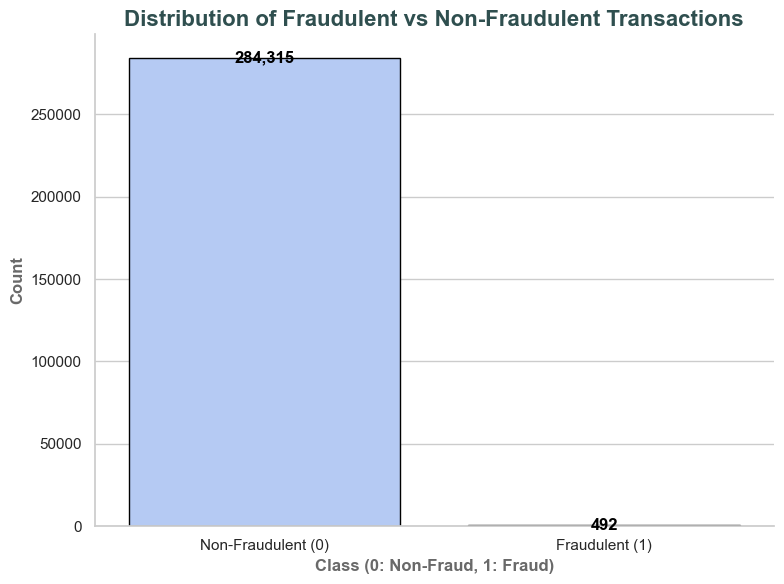

In [14]:
# Visualising the class imbalance (fraud vs non-fraud)
plt.figure(figsize=(8, 6))

# Use a more modern color palette and a refined style
sns.set(style="whitegrid")  # Use a modern, clean grid background
sns.set_palette("coolwarm")  # Choose a more modern, visually appealing color palette

# Countplot with additional styling and annotations
ax = sns.countplot(x='Class', data=data, palette="coolwarm", edgecolor='black')

# Title and labels with a more modern font style
ax.set_title("Distribution of Fraudulent vs Non-Fraudulent Transactions", fontsize=16, weight='bold', color='darkslategray')
ax.set_xlabel("Class (0: Non-Fraud, 1: Fraud)", fontsize=12, weight='bold', color='dimgray')
ax.set_ylabel("Count", fontsize=12, weight='bold', color='dimgray')

# Add count annotations on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', fontweight='bold')

# Remove spines for a cleaner look
sns.despine()

# Set the x-tick labels and make them more readable
plt.xticks([0, 1], ['Non-Fraudulent (0)', 'Fraudulent (1)'], rotation=0)

# Display the plot
plt.tight_layout()
plt.show()

### **Step 2: Data Preprocessing**

In [15]:
# -------------------------- Data Preprocessing --------------------------

# Handle missing values
print("\nHandling missing values...")
data_cleaned = data.dropna()  # Drop rows with missing values
print(f"Rows after handling missing values: {len(data_cleaned)}")

# Separate features and target variable
print("\nSeparating features and target variable...")
X = data_cleaned.drop(columns=['Class'])  # Features
y = data_cleaned['Class']  # Target variable
print("Features and target separated successfully")


Handling missing values...
Rows after handling missing values: 284807

Separating features and target variable...
Features and target separated successfully


In [16]:
# Scale numerical features using StandardScaler
scaler = StandardScaler()
try:
    X_scaled = scaler.fit_transform(X)
    print("\nFeature scaling completed successfully")
except Exception as e:
    print(f"Error during feature scaling: {e}")

# Confirm scaling success by checking the first few rows
print("\nFirst 5 rows of scaled features:")
print(X_scaled[:5])

# Split the data into training and testing sets (80-20 split)
try:
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
    print("\nData split into training and testing sets successfully")
except Exception as e:
    print(f"Error during train-test split: {e}")


Feature scaling completed successfully

First 5 rows of scaled features:
[[-1.99658302 -0.69424232 -0.04407492  1.6727735   0.97336551 -0.24511658
   0.34706795  0.19367894  0.08263728  0.33112778  0.08338555 -0.54040704
  -0.61829572 -0.99609892 -0.32461019  1.60401384 -0.53683287  0.24486345
   0.03076993  0.49628203  0.32611802 -0.02492336  0.38285444 -0.17691133
   0.11050692  0.24658544 -0.39217043  0.33089162 -0.06378115  0.24496426]
 [-1.99658302  0.60849633  0.16117592  0.1097971   0.31652293  0.04348335
  -0.06181997 -0.06370021  0.07125348 -0.23249419 -0.15334963  1.58000285
   1.06608857  0.4914182  -0.14998248  0.69436042  0.52943375 -0.13516997
  -0.21876258 -0.17908605 -0.08961086 -0.3073768  -0.88007675  0.16220118
  -0.56113055  0.3206939   0.26106948 -0.02225568  0.04460752 -0.34247454]
 [-1.99656197 -0.69350046 -0.81157783  1.16946849  0.26823129 -0.36457179
   1.35145359  0.63977564  0.20737273 -1.37867535  0.19069961  0.61182971
   0.06613662  0.72069985 -0.1731138

In [17]:
# Check the distribution of the target variable in train and test sets
print("\nTraining set target distribution:")
print(y_train.value_counts(normalize=True))
print("\nTesting set target distribution:")
print(y_test.value_counts(normalize=True))

# Print confirmation of successful data preprocessing
print("\nData preprocessing completed successfully")


Training set target distribution:
Class
0    0.998271
1    0.001729
Name: proportion, dtype: float64

Testing set target distribution:
Class
0    0.99828
1    0.00172
Name: proportion, dtype: float64

Data preprocessing completed successfully


### **Step 3: Model Selection**

In [18]:
# -------------------------- Model Selection --------------------------

# Initialise supervised learning models
logistic_model = LogisticRegression(random_state=42)
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42, n_estimators=100)
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

# Initialize anomaly detection models
isolation_forest_model = IsolationForest(random_state=42, contamination=0.01)
one_class_svm_model = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.01)

# Define Autoencoder architecture for anomaly detection
def build_autoencoder(input_dim):
    input_layer = Input(shape=(input_dim,))
    encoder = Dense(32, activation="relu")(input_layer)
    encoder = Dense(16, activation="relu")(encoder)
    encoder = Dense(8, activation="relu")(encoder)

    decoder = Dense(16, activation="relu")(encoder)
    decoder = Dense(32, activation="relu")(decoder)
    decoder = Dense(input_dim, activation="sigmoid")(decoder)

    autoencoder = Model(inputs=input_layer, outputs=decoder)
    autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return autoencoder

# Prepare data for Autoencoder
input_dim = X_train.shape[1]
autoencoder_model = build_autoencoder(input_dim)

# Print initialized models
print("\nSupervised Learning Models:")
print(f"1. Logistic Regression: {logistic_model}")
print(f"2. Decision Tree: {decision_tree_model}")
print(f"3. Random Forest: {random_forest_model}")
print(f"4. Gradient Boosting: {gradient_boosting_model}")

print("\nAnomaly Detection Models:")
print(f"1. Isolation Forest: {isolation_forest_model}")
print(f"2. One-Class SVM: {one_class_svm_model}")
print(f"3. Autoencoder Model Summary:")
autoencoder_model.summary()

# Confirm model selection step is complete
print("\nModel selection completed successfully")


Supervised Learning Models:
1. Logistic Regression: LogisticRegression(random_state=42)
2. Decision Tree: DecisionTreeClassifier(random_state=42)
3. Random Forest: RandomForestClassifier(random_state=42)
4. Gradient Boosting: GradientBoostingClassifier(random_state=42)

Anomaly Detection Models:
1. Isolation Forest: IsolationForest(contamination=0.01, random_state=42)
2. One-Class SVM: OneClassSVM(gamma=0.001, nu=0.01)
3. Autoencoder Model Summary:


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 30)             │           990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,334 (13.02 KB)

 Trainable params: 3,334 (13.02 KB)

 Non-trainable params: 0 (0.00 B)


Model selection completed successfully


### **Step 3: Model Training**

In [20]:
# -------------------------- Fitting the Model --------------------------

# Initialise models
logistic_model = LogisticRegression(random_state=42)
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

# Train models
logistic_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
gradient_boosting_model.fit(X_train, y_train)

print("Models trained successfully")

Models trained successfully


In [32]:
# -------------------------- Hyperparameter Tuning --------------------------

# Randomised Search for Decision Tree
tree_params = {'max_depth': [5, 10, 15, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
tree_random_search = RandomizedSearchCV(decision_tree_model, tree_params, n_iter=10, cv=3, random_state=42, n_jobs=-1)
tree_random_search.fit(X_train, y_train)
print("Best Hyperparameters for Decision Tree:", tree_random_search.best_params_)

Best Hyperparameters for Decision Tree: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10}


In [33]:
# Randomised Search for Random Forest
forest_params = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
forest_random_search = RandomizedSearchCV(random_forest_model, forest_params, n_iter=10, cv=3, random_state=42, n_jobs=-1)
forest_random_search.fit(X_train, y_train)
print("Best Hyperparameters for Random Forest:", forest_random_search.best_params_)

Best Hyperparameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20}


In [36]:
# Define the hyperparameter grid
logistic_params = {
    'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear', 'saga'], 'penalty': ['l1', 'l2'], 'max_iter': [100, 200]
}

# Initialise the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Setup RandomizedSearchCV
logistic_random_search = RandomizedSearchCV(estimator=logistic_model,
    param_distributions=logistic_params,
    n_iter=10,  # Randomly search 10 combinations
    cv=3,  # 3-fold cross-validation
    scoring='accuracy',  # Evaluation metric
    random_state=42,  # Reproducibility
    n_jobs=-1  # Utilise all available processors
)

# Perform the Randomised Search
logistic_random_search.fit(X_train, y_train)

# Output the best hyperparameters and accuracy score
print("Best Hyperparameters for Logistic Regression:")
print(logistic_random_search.best_params_)
print(f"Best Accuracy Score: {logistic_random_search.best_score_:.4f}")

Best Hyperparameters for Logistic Regression:
{'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 100, 'C': 10}
Best Accuracy Score: 0.9992
